 Building a sales propensity-to-buy model
 
 That is able to predict the probability that they will purchase one of our products  (“make a sale”).

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
sns.set(style="darkgrid", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D 
from scipy.stats import skew, norm, probplot, boxcox 
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore') 



In [9]:
import dask.dataframe as dd

In [10]:
##Imported the test and train datasets

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

##Saved the IDs to the side

# Exploratory Data Analysis



# TRAIN DATA


**Lets look at  our train dataset**

In [11]:
train.head()

,RowID,COL_1,COL_2,COL_3,COL_4,COL_5,SOLD
0,1yEGeg9E,190.0,VAL_A,7.0,4.0,-4.0,0
1,fEaDXHiD,215.0,VAL_B,7.0,8.0,-1.0,0
2,NMc0TKTM,NaN,NaN,NaN,28.0,18.0,0
3,OM0YAyZe,NaN,NaN,NaN,50.0,4.0,0
4,L4Ntlncn,NaN,NaN,NaN,14.0,23.0,0


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97086 entries, 0 to 97085
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RowID   97086 non-null  object 
 1   COL_1   43734 non-null  float64
 2   COL_2   47679 non-null  object 
 3   COL_3   44262 non-null  float64
 4   COL_4   79932 non-null  float64
 5   COL_5   97058 non-null  float64
 6   SOLD    97086 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 5.2+ MB


We can take a look at the dimensions of the train set to get an idea of the number of rows (n) and nummber of predictors (p) which is equal to one less than the number of columns.


In [92]:
train.shape

(97086, 7)

The shape command shows us that the train data has 97086 rows of data and 7 variables. We will try and model the sale  propensity per individual lead using the other 6 variables.

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97086 entries, 0 to 97085
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RowID   97086 non-null  object 
 1   COL_1   43734 non-null  float64
 2   COL_2   47679 non-null  object 
 3   COL_3   44262 non-null  float64
 4   COL_4   79932 non-null  float64
 5   COL_5   97058 non-null  float64
 6   SOLD    97086 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 5.2+ MB


 The Pandas library can help us investigate this further, using the info() function. This function tells us what columns are in the dataframe, how many null values they have and what datatype they are

In [94]:
train.isnull().sum()

RowID        0
COL_1    53352
COL_2    49407
COL_3    52824
COL_4    17154
COL_5       28
SOLD         0
dtype: int64

From the information generated, we can see that 5 column have missing values.


In [95]:

train_df.describe()

,COL_1,COL_3,COL_4,COL_5,SOLD
count,43734.000000,44262.000000,79932.000000,97058.000000,97086.000000
mean,204.195935,4.254530,9.818233,4.981557,0.004985
std,128.983008,2.104822,7.576108,10.914330,0.070431
min,-3.000000,-3.000000,0.000000,-39.000000,0.000000
25%,160.000000,2.000000,7.000000,-4.000000,0.000000
50%,215.000000,4.000000,8.000000,4.000000,0.000000
75%,265.000000,6.000000,10.000000,13.000000,0.000000
max,888.000000,8.000000,55.000000,83.000000,1.000000


In [96]:
print(train.isnull())  ##check for nulls 

       RowID  COL_1  COL_2  COL_3  COL_4  COL_5   SOLD
0      False  False  False  False  False  False  False
1      False  False  False  False  False  False  False
2      False   True   True   True  False  False  False
3      False   True   True   True  False  False  False
4      False   True   True   True  False  False  False
...      ...    ...    ...    ...    ...    ...    ...
97081  False   True   True   True   True  False  False
97082  False  False  False  False  False  False  False
97083  False  False  False  False  False  False  False
97084  False  False  False  False  False  False  False
97085  False  False  False  False  False  False  False

[97086 rows x 7 columns]


In [97]:
#replace all nAN WITH 0 



# replace all NA's with 0
train_df = train.copy()
train_df.fillna(0)



,RowID,COL_1,COL_2,COL_3,COL_4,COL_5,SOLD
0,1yEGeg9E,190.0,VAL_A,7.0,4.0,-4.0,0
1,fEaDXHiD,215.0,VAL_B,7.0,8.0,-1.0,0
2,NMc0TKTM,0.0,0,0.0,28.0,18.0,0
3,OM0YAyZe,0.0,0,0.0,50.0,4.0,0
4,L4Ntlncn,0.0,0,0.0,14.0,23.0,0
...,...,...,...,...,...,...,...
97081,aAy1WY9w,0.0,0,0.0,0.0,-6.0,0
97082,NSwGsRtM,285.0,VAL_A,5.0,7.0,-1.0,0
97083,4q5ZQqlc,275.0,VAL_B,2.0,8.0,0.0,0
97084,8lY3uHwR,175.0,VAL_B,3.0,5.0,31.0,0


In [98]:
train_df.skew()

COL_1     1.480234
COL_3    -0.126046
COL_4     3.128925
COL_5     0.309467
SOLD     14.057099
dtype: float64

It appears that only SOLD (our target) is fairly symmetrical. The rest of our features appear to be highly skewed in the positive direction.


In [99]:
train_df.kurtosis()

COL_1      8.778838
COL_3     -1.142294
COL_4     12.228254
COL_5     -0.166720
SOLD     195.606055
dtype: float64

In [100]:
train_df.describe()


,COL_1,COL_3,COL_4,COL_5,SOLD
count,43734.000000,44262.000000,79932.000000,97058.000000,97086.000000
mean,204.195935,4.254530,9.818233,4.981557,0.004985
std,128.983008,2.104822,7.576108,10.914330,0.070431
min,-3.000000,-3.000000,0.000000,-39.000000,0.000000
25%,160.000000,2.000000,7.000000,-4.000000,0.000000
50%,215.000000,4.000000,8.000000,4.000000,0.000000
75%,265.000000,6.000000,10.000000,13.000000,0.000000
max,888.000000,8.000000,55.000000,83.000000,1.000000


**Multivariate Analysis**

 we determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.

In [101]:
#CHECK FOR CORRELATION WITHIN OUR FEATURES
train_df.corr()

,COL_1,COL_3,COL_4,COL_5,SOLD
COL_1,1.000000,0.189595,0.027440,-0.106993,-0.014100
COL_3,0.189595,1.000000,0.009136,-0.196264,-0.013375
COL_4,0.027440,0.009136,1.000000,-0.004715,-0.039746
COL_5,-0.106993,-0.196264,-0.004715,1.000000,-0.003325
SOLD,-0.014100,-0.013375,-0.039746,-0.003325,1.000000


**Graphical Analysis**

**Univariate Analysis**

We determine the distribution of our numerical features using the following:

    Histogram
    Density plot

For a categorical feature we will use a:

    Bar Graph



HISTOGRAM

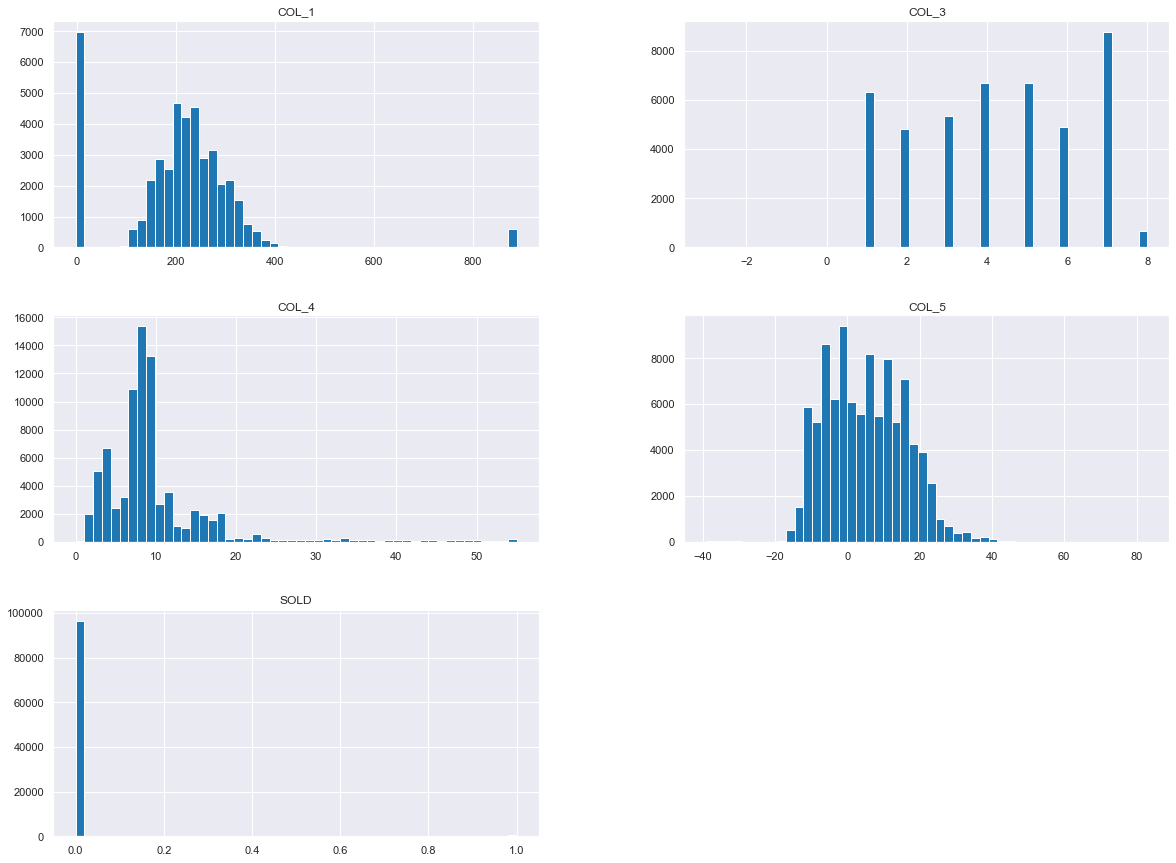

In [102]:
features = ['COL_1','COL_3', 'COL_4', 'COL_5' ,'SOLD',] # create a list of all numerical features
train_df[features].hist(bins=50, figsize=(20,15), color = 'tab:blue' );

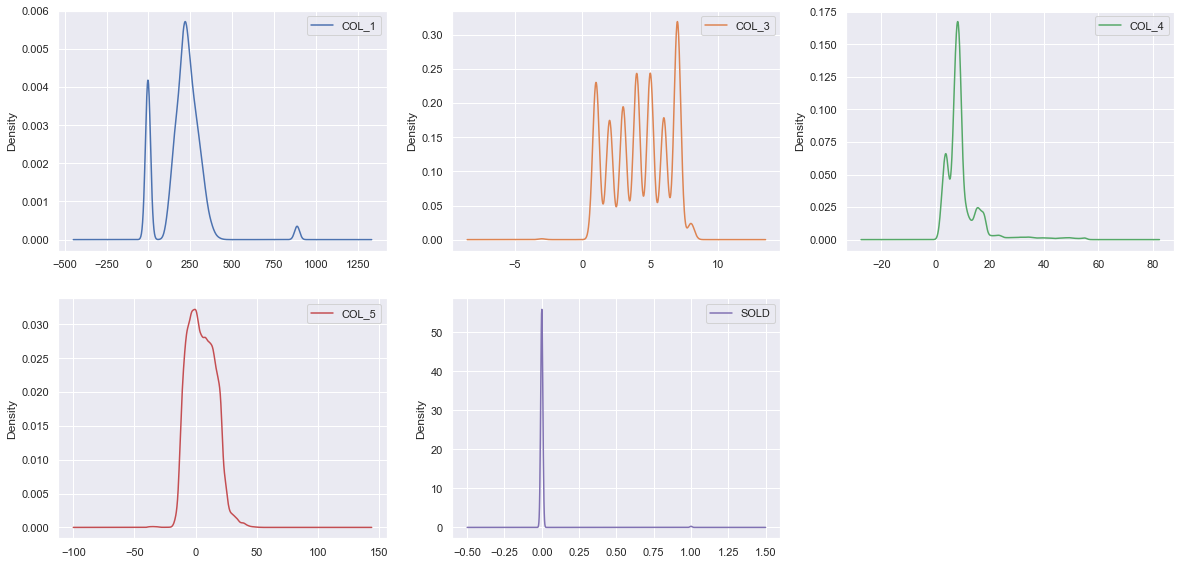

In [103]:
train_df[features].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(20, 15));

The histogram and density plot confirms the high positive skew in of feature, as well as the presence of outliers.


**Bar plot**

For the categorical features, we can create a bar plot to display the frequency distribution. 

In [104]:
sns.countplot?

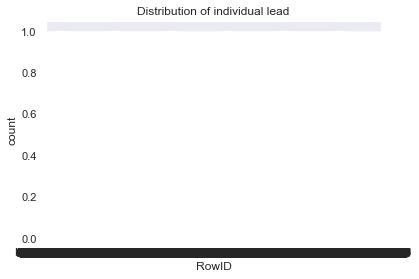

In [105]:
sns.countplot(x = 'RowID', data = train_df, palette="dark")
plt.title("Distribution of individual lead");

**Multivariate Analysis**

For the multivariate graphical analysis the following visualisations will be considered:

    Heatmap
    Scatter Plot



**Heatmap**

The relationship (correlation) between features (previosly determined by the train_df.corr() command)can also be displayed graphically using a heatmap. We use the Seaborn library for this basic heatmap visualisation.

The correlation coefficient value will be displayed on the heatmap using the vmin and vmax parameters.


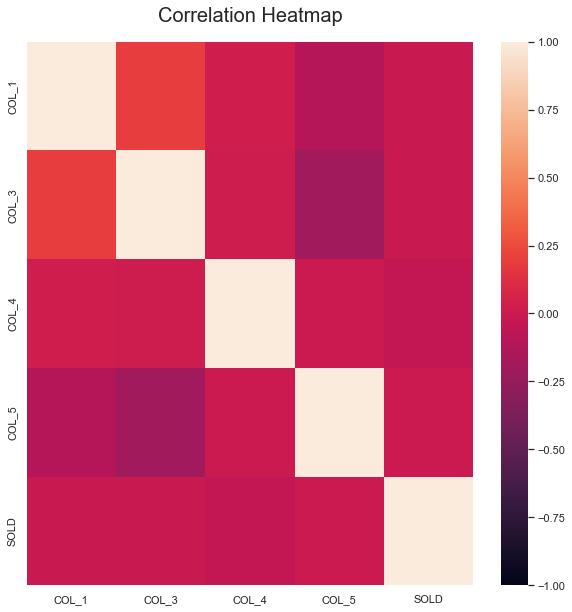

In [106]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

# TEST DATA

**Let's now have a quick look at our test data**


In [107]:
test.head()

,RowID,COL_1,COL_2,COL_3,COL_4,COL_5
0,qdLKOakL,NaN,NaN,NaN,7.0,-10.0
1,EAdy7xWw,NaN,NaN,NaN,4.0,-3.0
2,RDk3xms3,NaN,NaN,NaN,NaN,-7.0
3,UqhTxf1W,145.0,VAL_B,1.0,9.0,0.0
4,K3btynUK,270.0,VAL_B,1.0,6.0,17.0


In [69]:
test.shape

(20000, 6)

In [70]:
#replace all nAN WITH 0 



# replace all NA's with 0
test_df = test.copy()
test_df.fillna(0)


,RowID,COL_1,COL_2,COL_3,COL_4,COL_5
0,qdLKOakL,0.0,0,0.0,7.0,-10.0
1,EAdy7xWw,0.0,0,0.0,4.0,-3.0
2,RDk3xms3,0.0,0,0.0,0.0,-7.0
3,UqhTxf1W,145.0,VAL_B,1.0,9.0,0.0
4,K3btynUK,270.0,VAL_B,1.0,6.0,17.0
...,...,...,...,...,...,...
19995,zYE7JEpg,200.0,VAL_B,2.0,15.0,20.0
19996,qW12HW3d,220.0,VAL_B,6.0,7.0,-1.0
19997,nJl1WlKN,0.0,0,0.0,14.0,-6.0
19998,WatcCls3,235.0,VAL_B,6.0,0.0,9.0


In [21]:

test_df.describe()

,COL_1,COL_3,COL_4,COL_5
count,9259.000000,9374.000000,16534.000000,19996.000000
mean,204.010152,4.259441,9.719608,5.054411
std,130.494933,2.094101,7.453641,10.929575
min,-3.000000,-3.000000,1.000000,-38.000000
25%,160.000000,3.000000,7.000000,-4.000000
50%,215.000000,4.000000,8.000000,4.000000
75%,265.000000,6.000000,10.000000,13.000000
max,888.000000,8.000000,55.000000,83.000000


# Feature Selection

We look for the highest correlation with the target, and the features with the most variance. During this process, we remove features that do not maximize model performance.

**Before we begin the process, let us take a look at the distribution of our SOLD:**


<AxesSubplot:xlabel='SOLD', ylabel='Density'>

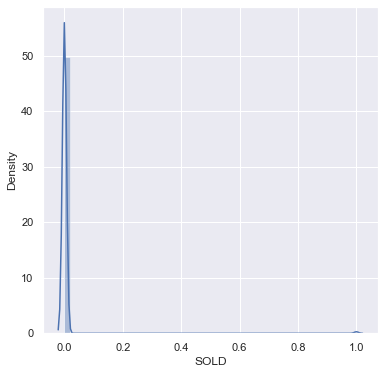

In [22]:
# target distribution
plt.figure(figsize=(6,6))
sns.distplot(train_df['SOLD'],kde=True)

The data seems to be fairly distributed around the mean.

In [78]:
train['SOLD'].sort_values(ascending=False)[:5]

87802    1
96516    1
40551    1
91359    1
11077    1
Name: SOLD, dtype: int64

In [82]:
train[train['SOLD'] == 11077]

,RowID,COL_1,COL_2,COL_3,COL_4,COL_5,SOLD


In [83]:
train['SOLD'].sort_values()[:5]

0        0
64656    0
64655    0
64654    0
64653    0
Name: SOLD, dtype: int64

In [85]:
train[train['SOLD'] == 1]

,RowID,COL_1,COL_2,COL_3,COL_4,COL_5,SOLD
12,IBURE3Hg,225.0,VAL_B,3.0,3.0,12.0,1
21,9i9RO0FA,-3.0,VAL_B,4.0,3.0,-9.0,1
119,gk5Mqm0x,-3.0,VAL_A,5.0,9.0,15.0,1
156,nDwI1K7b,255.0,VAL_B,1.0,2.0,6.0,1
208,Qjj1QzBQ,230.0,VAL_B,5.0,3.0,7.0,1
...,...,...,...,...,...,...,...
95914,Rc5rPTyi,-3.0,VAL_B,4.0,7.0,9.0,1
96151,0YJBb6uK,230.0,VAL_B,3.0,NaN,-13.0,1
96516,QU9emGN4,315.0,VAL_B,5.0,2.0,1.0,1
96956,Iej33HfG,-3.0,VAL_A,7.0,7.0,4.0,1


In [86]:
train[train['SOLD'] == 0]

,RowID,COL_1,COL_2,COL_3,COL_4,COL_5,SOLD
0,1yEGeg9E,190.0,VAL_A,7.0,4.0,-4.0,0
1,fEaDXHiD,215.0,VAL_B,7.0,8.0,-1.0,0
2,NMc0TKTM,NaN,NaN,NaN,28.0,18.0,0
3,OM0YAyZe,NaN,NaN,NaN,50.0,4.0,0
4,L4Ntlncn,NaN,NaN,NaN,14.0,23.0,0
...,...,...,...,...,...,...,...
97081,aAy1WY9w,NaN,NaN,NaN,NaN,-6.0,0
97082,NSwGsRtM,285.0,VAL_A,5.0,7.0,-1.0,0
97083,4q5ZQqlc,275.0,VAL_B,2.0,8.0,0.0,0
97084,8lY3uHwR,175.0,VAL_B,3.0,5.0,31.0,0


# Prepocessing

Dropping columns

In [23]:
train_df = train_df.drop(['COL_2'], axis=1)
train_df.head()

,RowID,COL_1,COL_3,COL_4,COL_5,SOLD
0,1yEGeg9E,190.0,7.0,4.0,-4.0,0
1,fEaDXHiD,215.0,7.0,8.0,-1.0,0
2,NMc0TKTM,NaN,NaN,28.0,18.0,0
3,OM0YAyZe,NaN,NaN,50.0,4.0,0
4,L4Ntlncn,NaN,NaN,14.0,23.0,0



    COL2 was removed to improve accuracy, since none of the dates were significantly correlated with the response variable avg_price_per_kg. Continued use of the date column significantly increased the number of our features, and caused some inefficiencies.
    Upon doing dummy encoding on all the data, the SOLD column ended up with 1's, making it a redundant variable.


REPEAT FOR TEST DATA

In [24]:
test_df = test_df.drop(['COL_2'], axis=1)
train_df.head()

,RowID,COL_1,COL_3,COL_4,COL_5,SOLD
0,1yEGeg9E,190.0,7.0,4.0,-4.0,0
1,fEaDXHiD,215.0,7.0,8.0,-1.0,0
2,NMc0TKTM,NaN,NaN,28.0,18.0,0
3,OM0YAyZe,NaN,NaN,50.0,4.0,0
4,L4Ntlncn,NaN,NaN,14.0,23.0,0


As previously determined, there is a presence of outliers in our features. Outliers are defined as data points that differ significantly from other observations, thus affecting the range and distribution of data. Machine learning models are sensitive to the range and distribution of data. We want our model to learn from the actual trend and not the noise. By removing outlier we attempt to reduce th noise in the data.

Seeing that our features are not symmetric (normally distributed), use the Interquartile Range method to determine and remove the outliers. The following function removes outliers from all the features:


**Dummy Encoding Variables**

In the process of model prediction, all variables need to be numeric. As we've observed that, our data contains some categorical/text data (Province, Container, Size_Grade), which we need to transform into numbers before we can train our model. To do this, we use a Pandas method called get_dummies(). The method will transform all the categorical text data into numbers by adding a column for each distinct category


In [27]:
dummy_train_df = pd.get_dummies(train_df,drop_first = True)
dummy_train_df.head()

,COL_1,COL_3,COL_4,COL_5,SOLD,RowID_001ZhvBL,RowID_004gCfrb,RowID_00ARKMNx,RowID_00BMtdrH,RowID_00De16tP,...,RowID_zzg0hZXW,RowID_zzkEcoCX,RowID_zzkNat9f,RowID_zzlD1yny,RowID_zzoMlelx,RowID_zzpDnUiN,RowID_zzpdoFP1,RowID_zzvcY7ua,RowID_zzy7M2m9,RowID_zzzYiGyZ
0,190.0,7.0,4.0,-4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,215.0,7.0,8.0,-1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,28.0,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,50.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,14.0,23.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# split data into predictors and response 

y = dummy_train_df['SOLD']

In [38]:
y_data = dummy_train_df['SOLD'] 

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [73]:
X = preprocessing.scale(dummy_train_df.iloc[:, 1:43].values)
X_feature = dummy_train_df.iloc[:, 1:43].columns

y = dummy_train_df.iloc[:, 3].values

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [74]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (67960, 42)
y_train shape: (67960,)
X_test shape: (29126, 42)
y_test shape: (29126,)


In [76]:
dummy_train_df.iloc[:, 1:49].head()

,COL_3,COL_4,COL_5,SOLD,RowID_001ZhvBL,RowID_004gCfrb,RowID_00ARKMNx,RowID_00BMtdrH,RowID_00De16tP,RowID_00E2syLQ,...,RowID_01HUPXX7,RowID_01JAUr1E,RowID_01JEJ9cU,RowID_01JUlIOx,RowID_01LEbJaY,RowID_01NPm9D2,RowID_01Uy4TO4,RowID_01V8cXHn,RowID_01ePbzty,RowID_01fTPIMI
0,7.0,4.0,-4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,8.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,28.0,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,50.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,14.0,23.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y_test

array([-9.,  2., -6., ..., 15.,  5., -2.])

In [75]:
X_data = dummy_train_df('SOLD', axis=1)

TypeError: 'DataFrame' object is not callable

In [40]:
mask = np.zeros(edges.shape,dtype='uint8')

NameError: name 'edges' is not defined

In [36]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

NameError: name 'X_data' is not defined

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.02)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

In [35]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)] #will create a list of dictionaries
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

NameError: name 'selector' is not defined

In [4]:
submission.to_csv("testing(v_reg_pred).csv", index=False)

NameError: name 'submission' is not defined

In [5]:
sub= pd.read_csv('SampleSubmission.csv')

In [6]:
sub.head()

,RowId,Prediction,Classification
0,sFvx60fE,0.040256,0
1,CvLgpCHo,0.006290,0
2,JAsCGaRB,0.049014,0
3,ClvOMUFN,0.078437,0
4,911lYZpr,0.021578,0


In [7]:
sub.tail()

,RowId,Prediction,Classification
5,beb7Ozpq,0.023465,0
6,T1LDbXQF,0.041568,0
7,gRpCjCsM,0.034478,0
8,xHkbIyuX,0.080271,1
9,7A9nt9y1,0.079342,1
